# importing libraries

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# now loading the data

In [ ]:
df_train = pd.read_csv("loan-train.csv.xls")
df_test = pd.read_csv("loan-test.csv.xls")

In [ ]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


the Loan_ID column is not useful for us and building a model then we can drop it

In [ ]:
df_train.drop(columns='Loan_ID', inplace = True)
df_test.drop(columns='Loan_ID', inplace = True)

Lets get more data from our columns by df.info()

In [ ]:
df_train.info()
#here so many values are missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


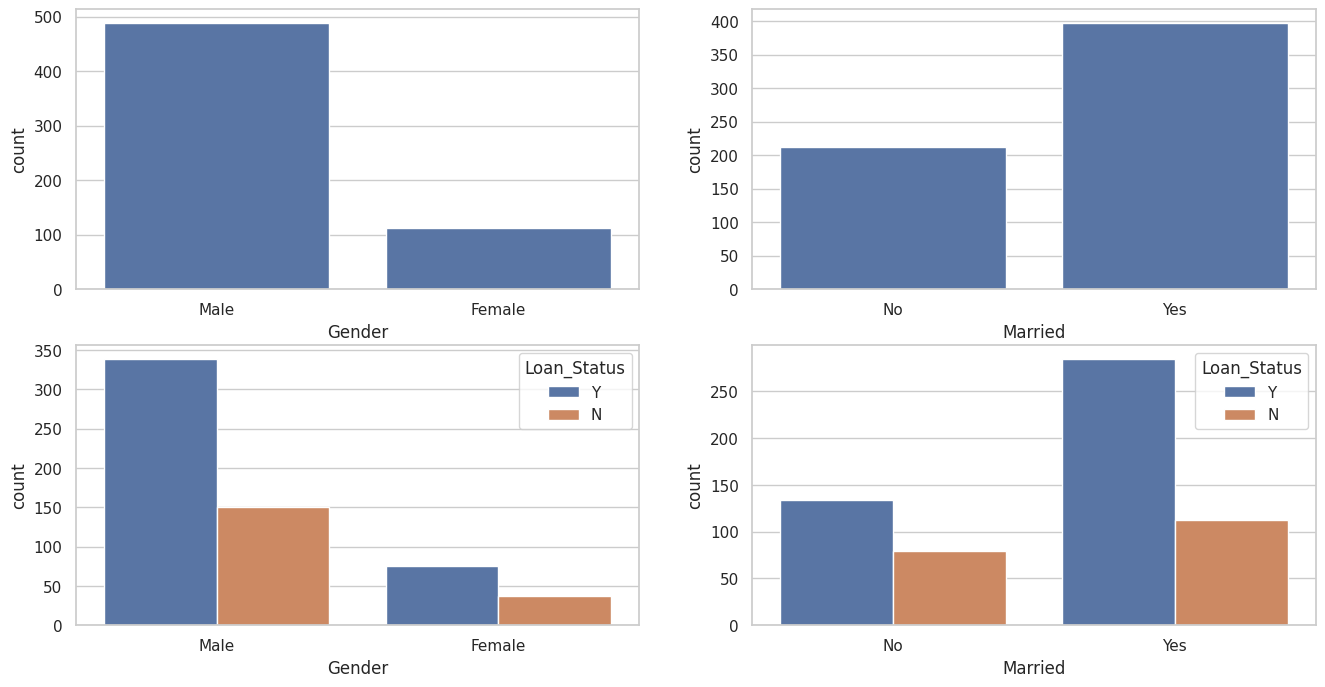

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.countplot(x = 'Gender' , data = df_train)
plt.subplot(2,2,2)
sns.countplot(x = 'Married', data= df_train)
plt.subplot(2,2,3)
sns.countplot(x = 'Gender', hue= 'Loan_Status', data = df_train)
plt.subplot(2,2,4)
sns.countplot(x = 'Married',hue = 'Loan_Status' , data= df_train)
plt.show()

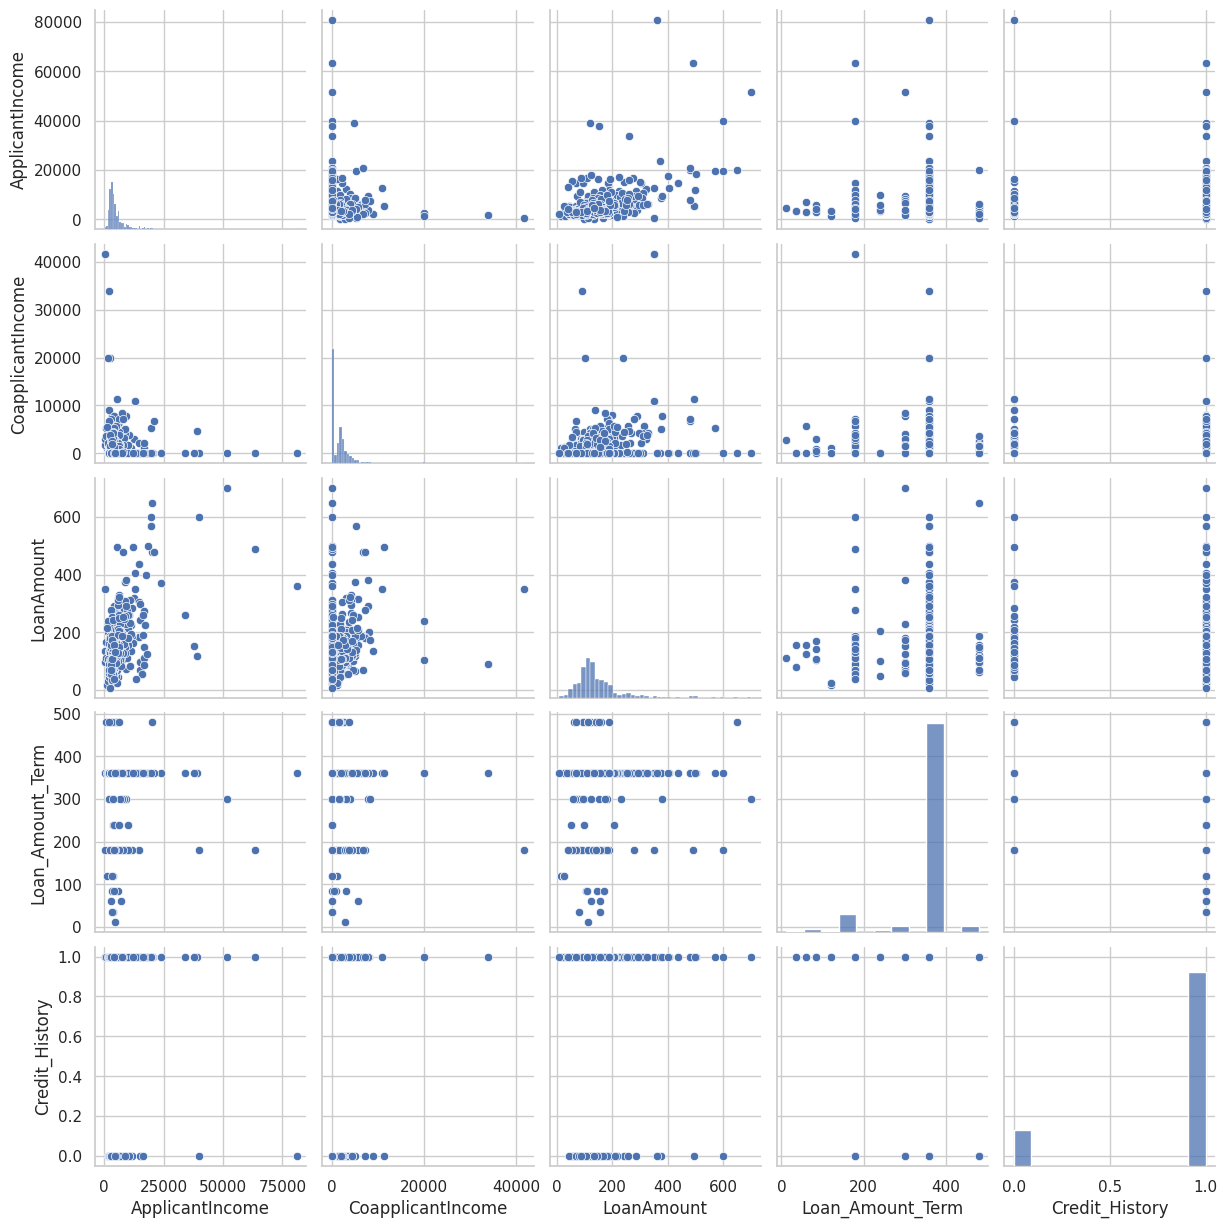

In [ ]:
sns.pairplot(df_train)
plt.show()

Its look like ApplicantIncome and LoanAmount have a linear relationship , and this relationship is make sense cause more income more loan amount can affort .

## lets check it more

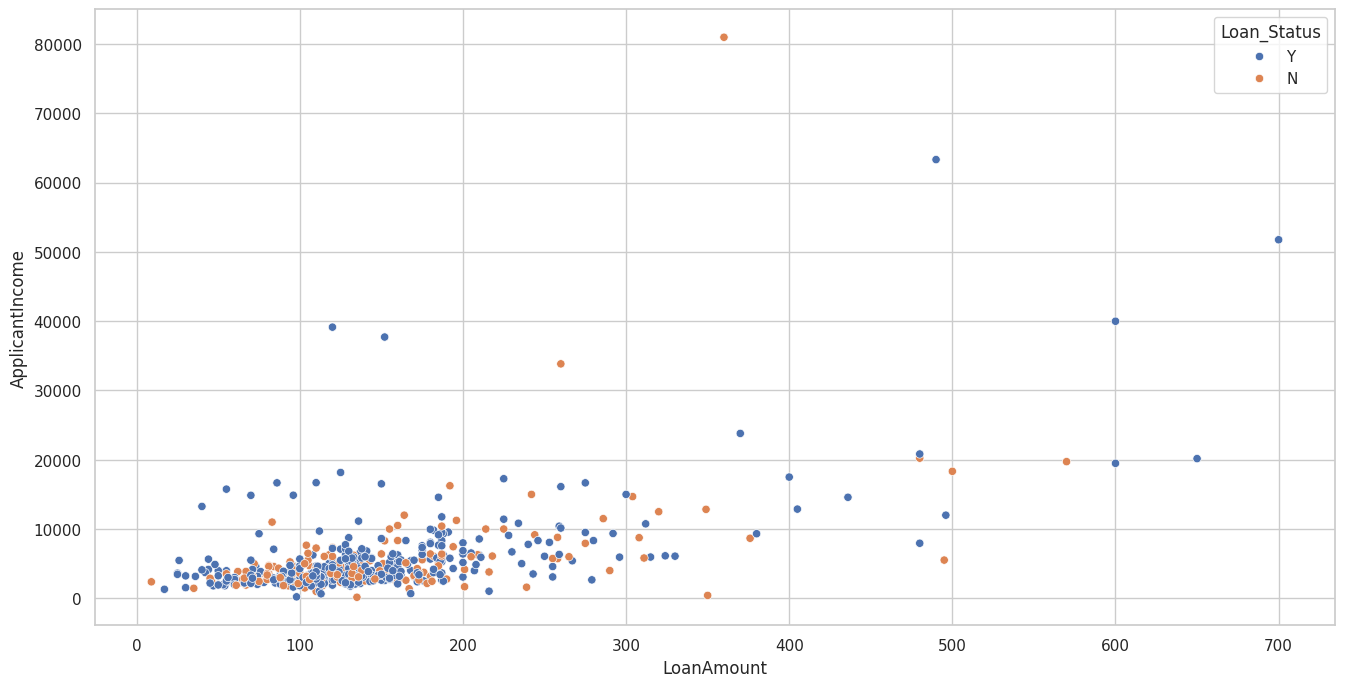

In [ ]:
plt.figure(figsize = (16,8))
sns.scatterplot(x = 'LoanAmount' , y = 'ApplicantIncome' , hue = 'Loan_Status', data = df_train)
plt.show()

And it is look like there is no obvious relationship between these 2 features and Loan_Status

## Lets check category variables more

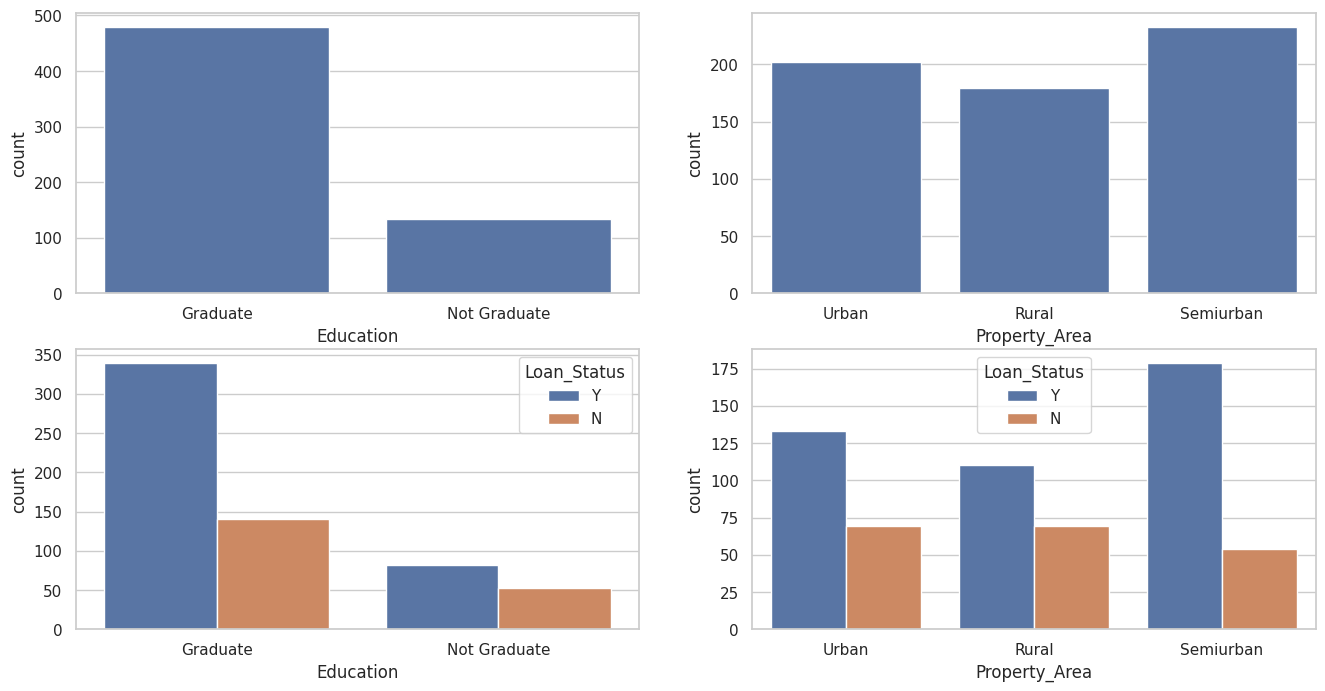

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.countplot(x = 'Education' , data = df_train)
plt.subplot(2,2,2)
sns.countplot(x = 'Property_Area', data= df_train)
plt.subplot(2,2,3)
sns.countplot(x = 'Education', hue= 'Loan_Status', data = df_train)
plt.subplot(2,2,4)
sns.countplot(x = 'Property_Area',hue = 'Loan_Status' , data= df_train)
plt.show()

In [ ]:
graduate = df_train['Education'].value_counts()['Graduate']
not_graduate = df_train['Education'].value_counts()['Not Graduate']
graduate_yes = df_train[df_train['Loan_Status'] == 'Y']['Education'].value_counts()['Graduate']
not_graduate_yes = df_train[df_train['Loan_Status'] == 'Y']['Education'].value_counts()['Not Graduate']

In [ ]:
print(graduate_yes / graduate)
print(not_graduate_yes / not_graduate)

0.7083333333333334
0.6119402985074627


oh its look like if you are graduate you have more possiblity to take Loan

now checking the statistics of self_employed people who are getting loan

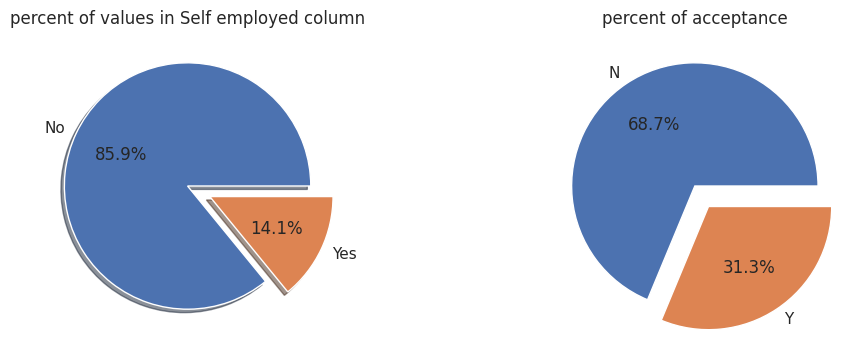

In [ ]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.pie(df_train['Self_Employed'].value_counts(),explode = [0,0.2] , autopct='%.1f%%' , shadow = True , labels = ['No', 'Yes'])
plt.title('percent of values in Self employed column')
plt.subplot(1,2,2)
plt.pie(df_train['Loan_Status'].value_counts(), explode = [0,0.2], autopct = '%.1f%%' , labels = ['N', 'Y'])
plt.title('percent of acceptance')
plt.show()

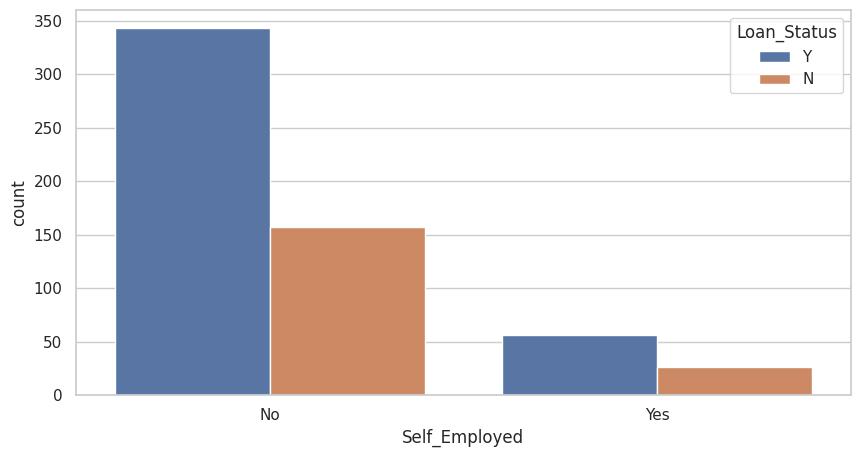

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='Self_Employed' , hue = 'Loan_Status' , data = df_train)
plt.show()

number of who are not self employed is high so the number of them who can take loan is higher than the rest

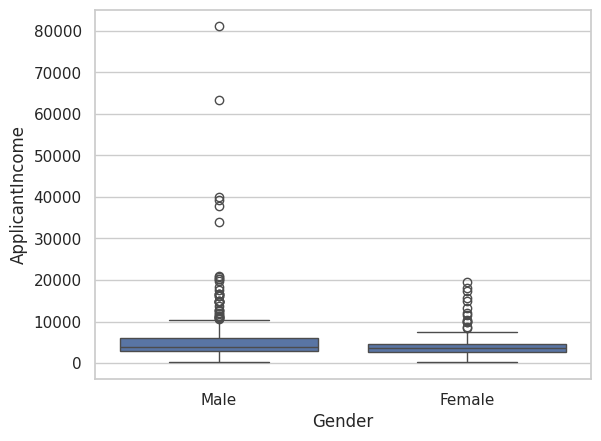

In [ ]:
sns.boxplot(x = 'Gender', y='ApplicantIncome' , data = df_train)
plt.show()

it is showing us that men have higher median income than women and there are someones that have income more than 20 thousends dollar at year even its rising up to 80 thousends dollar but all of the women have 20 thousends dollar and lower .

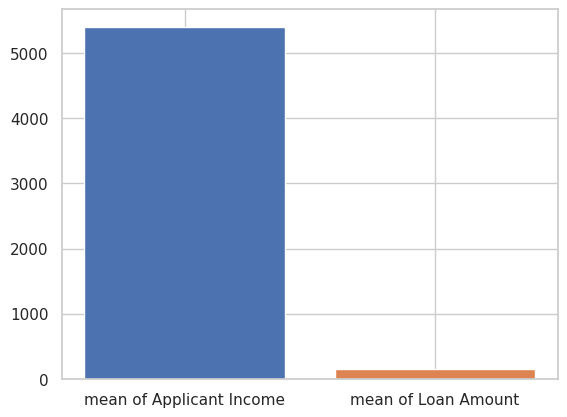

In [ ]:
plt.bar('mean of Applicant Income',df_train['ApplicantIncome'].mean())
plt.bar('mean of Loan Amount', df_train['LoanAmount'].mean())
plt.show()

for the columns that are object type we need to take care of them by turn them into numerical columns.\
Now we need to know what value they have

In [ ]:
print('Unique values in Gender :',df_train['Gender'].unique())
print('Unique values in Married :',df_train['Married'].unique())
print('Unique values in Dependents :',df_train['Dependents'].unique())
print('Unique values in Education :',df_train['Education'].unique())
print('Unique values in Self Employed :',df_train['Self_Employed'].unique())
print('Unique values in Property Area :',df_train['Property_Area'].unique())
print('Unique values in Loan Status :',df_train['Loan_Status'].unique())

Unique values in Gender : ['Male' 'Female' nan]
Unique values in Married : ['No' 'Yes' nan]
Unique values in Dependents : ['0' '1' '2' '3+' nan]
Unique values in Education : ['Graduate' 'Not Graduate']
Unique values in Self Employed : ['No' 'Yes' nan]
Unique values in Property Area : ['Urban' 'Rural' 'Semiurban']
Unique values in Loan Status : ['Y' 'N']


now when we know their value , we can turn them to numeric.\
using replace method like what i am applying

In [ ]:
df_train['Gender'] = df_train['Gender'].replace(['Male','Female'],[1,0])

In [ ]:
df_train['Married'] = df_train['Married'].replace(['Yes','No'],[1,0])
df_train['Dependents'] = df_train['Dependents'].replace(['0','1','2'],[0,1,2])
df_train['Dependents'] = df_train['Dependents'].replace('3+' , 3)
df_train['Education'] = df_train['Education'].replace(['Graduate' , 'Not Graduate'],[1,0])
df_train['Self_Employed'] = df_train['Self_Employed'].replace(['Yes','No'],[1,0])
df_train['Property_Area'] = df_train['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])
df_train['Loan_Status'] = df_train['Loan_Status'].replace(['Y','N'],[1,0])

In [ ]:
df_train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.050489,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


Lets find out how many missing value we have

In [ ]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Lets check if we drop the missing values then data is going to skewed or not

In [ ]:
df_temp = df_train.dropna()

In [ ]:
df_temp.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.085417,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.839398,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


By comparing this two describe table , we realized that the mean for every column change near 1 percent then its a good technique

the Property Area column has 3 diffrent value , since we turn them to numric maybe there is no order between them so its better to have one column for every value.\
it could be done by 2 ways.\
using pd.get_dummies method\
other way may be hot encoder from sklearn library

In [ ]:
df_temp = pd.get_dummies(df_temp , columns = ['Property_Area'])
#Compatibility with Machine Learning Algorithms: Many machine learning algorithms
#require numerical input and cannot work directly with categorical data. One-hot
#encoding converts categorical data into a numerical format without introducing
#any ordinal relationships.

In [ ]:
df_temp

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_0,Property_Area_1,Property_Area_2
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,False,True,False
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,True,False,False
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,True,False,False
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,True,False,False
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,False,True,False
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,False,True,False
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,True,False,False
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,True,False,False


# Lets plot the Correlation Matrix
to find the high correlated columns with Loan Status

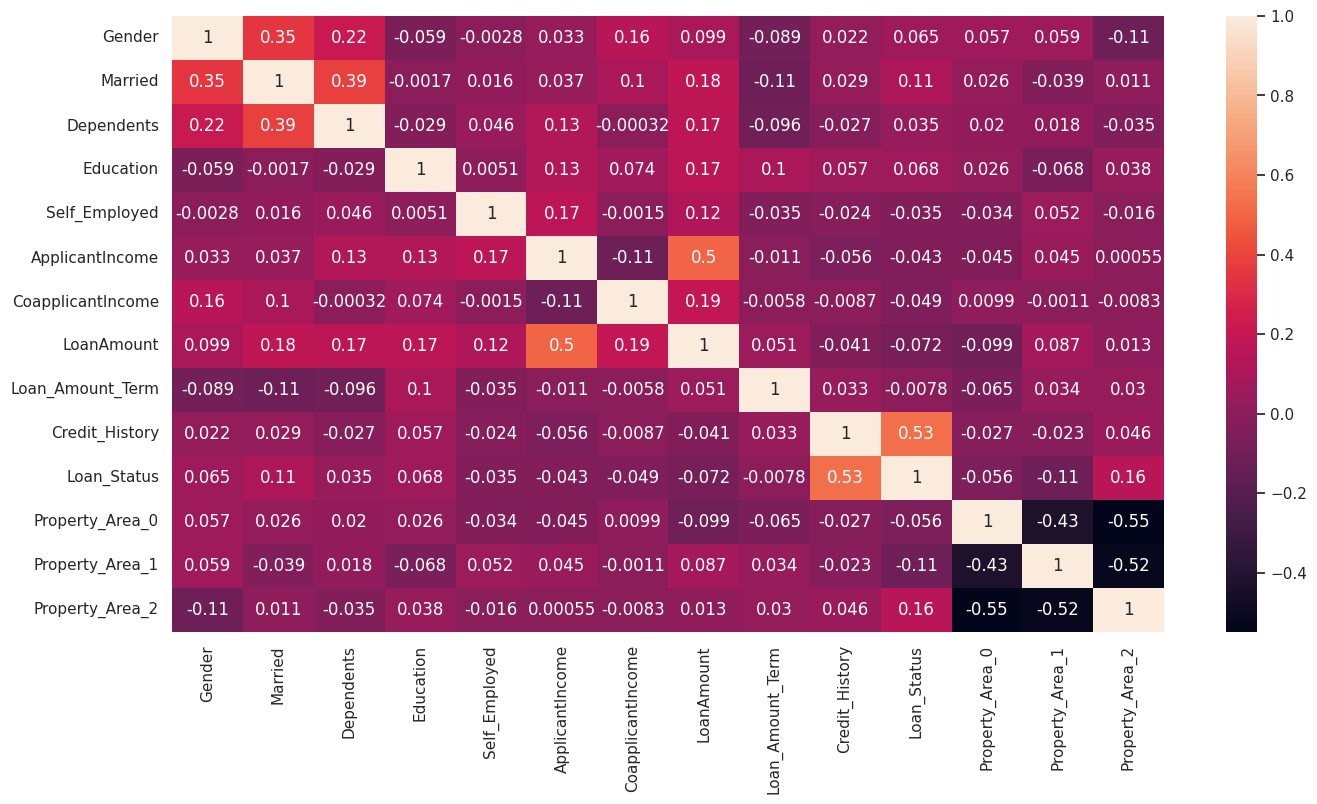

In [ ]:
corr = df_temp.corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr , annot = True )
plt.show()

droping the nan value from test set

In [ ]:
df_test.dropna(inplace = True)

In [ ]:
df_test['Property_Area'] = df_test['Property_Area'].replace(['Urban' ,'Rural' ,'Semiurban'],[0,1,2])

In [ ]:
df_test = pd.get_dummies(df_test , columns = ['Property_Area'])

In [ ]:
df_test['Married'] = df_test['Married'].replace(['Yes', 'No'], [1,0])

In [ ]:
df_tr_x = df_temp[['Married' , 'Credit_History' , 'Property_Area_1', 'Property_Area_2']].values
df_tr_y = df_temp['Loan_Status'].values
df_ts = df_test[['Married', 'Credit_History', 'Property_Area_1', 'Property_Area_2']].values

# Lets build models

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.0


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

x_train: The training subset of the feature matrix.
x_test: The testing subset of the feature matrix.
y_train: The training subset of the target vector.
y_test: The testing subset of the target vector.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_tr_x , df_tr_y , test_size = 0.25)

NameError: name 'df_tr_x' is not defined

In [ ]:
cls_lr = LogisticRegression()
cls_lr.fit(x_train, y_train)
y_pred = cls_lr.predict(x_test)
print(classification_report(y_test , y_pred))
ConfusionMatrixDisplay.from_estimator(cls_lr , x_test, y_test)
plt.show()

Accuracy is not bad but the f1 score and recall is low.\
let try with KFold Cross Validation to find the mean Accuracy

In [ ]:
cross_val = cross_val_score(cls_lr , x_train, y_train , cv=10)
print(cross_val.mean())

well the accuracy is even lower than the first try.\
lets try Random Forest

In [ ]:
cls_rf = RandomForestClassifier()
cls_rf.fit(x_train, y_train)
y_pred = cls_rf.predict(x_test)
print(classification_report(y_test , y_pred))
ConfusionMatrixDisplay.from_estimator(cls_rf, x_test, y_test)
plt.show()

Surprisingly the accuracy of Random Forest and Logistic Regressin is the same.\
not only accuracy but also f1-score , recall and etc in the classification report

In [ ]:
cross_val = cross_val_score(cls_rf , x_train, y_train , cv=10)
print(cross_val.mean())

lets check the K Nearest Neighbors

In [ ]:
results = []
for i in range(1,25):
    cls_knn_2 = KNeighborsClassifier(n_neighbors=i)
    cls_knn_2.fit(x_train, y_train)
    score = cls_knn_2.score(x_test ,y_test)
    results.append([score])

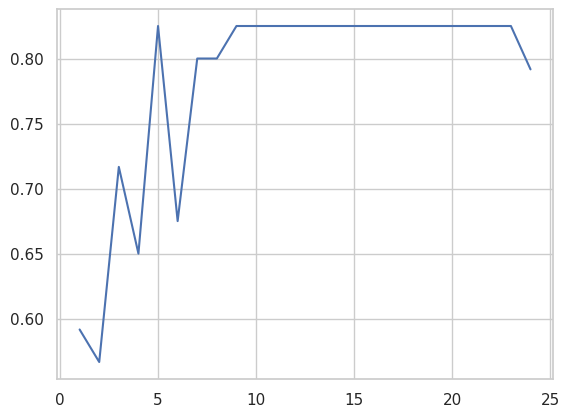

In [48]:
plt.plot(list(range(1,25)) , results)
plt.show()

above plot show us that with k is higher than 11 we have highest accuracy except when k equals to 20

In [ ]:
cls_knn = KNeighborsClassifier(n_neighbors=11)
cls_knn.fit(x_train, y_train)
predicted = cls_knn.predict(df_ts)

In [ ]:
predicted